# Importing dataset and libraries

In [1]:
# importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing data
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Data Analysis

In [3]:
# get size of dataset
df.shape

(48895, 16)

In [4]:
# get basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# get number of unique features in each column
for col in df.columns:
    print(col, "has", df[col].nunique(), "distinct values")
    if df[col].nunique() <= 10:
        print("Distribution of distinct values in column", col)
        print(df[col].value_counts())
    print()

id has 48895 distinct values

name has 47905 distinct values

host_id has 37457 distinct values

host_name has 11452 distinct values

neighbourhood_group has 5 distinct values
Distribution of distinct values in column neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

neighbourhood has 221 distinct values

latitude has 19048 distinct values

longitude has 14718 distinct values

room_type has 3 distinct values
Distribution of distinct values in column room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

price has 674 distinct values

minimum_nights has 109 distinct values

number_of_reviews has 394 distinct values

last_review has 1764 distinct values

reviews_per_month has 937 distinct values

calculated_host_listings_count has 47 distinct values

availability_365 has 366 distinct values



In [6]:
# separate neighbourhoods into their groups
for neighbourhood_group in df["neighbourhood_group"].unique():
    print("For neighborhood group", neighbourhood_group)
    print(df[df["neighbourhood_group"] == neighbourhood_group]["neighbourhood"].value_counts(), "\n")

For neighborhood group Brooklyn
Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    175
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Downtown Brookly

In [19]:
# obtain distribution of average price, minimum nights, review count, monthly reviews, host listing count, availability
neighbourhood_groups = df["neighbourhood_group"].unique()
neighbourhood_group_attributes = []
for neighbourhood_group in neighbourhood_groups:
    price = df[df["neighbourhood_group"] == neighbourhood_group]["price"].mean()
    min_nights = df[df["neighbourhood_group"] == neighbourhood_group]["minimum_nights"].mean()
    no_of_reviews = df[df["neighbourhood_group"] == neighbourhood_group]["number_of_reviews"].mean()
    monthly_reviews = df[df["neighbourhood_group"] == neighbourhood_group]["reviews_per_month"].mean()
    host_listing_count = df[df["neighbourhood_group"] == neighbourhood_group]["calculated_host_listings_count"].mean()
    availability = df[df["neighbourhood_group"] == neighbourhood_group]["availability_365"].mean()
    
    arr = [
        price,
        min_nights,
        no_of_reviews,
        monthly_reviews,
        host_listing_count,
        availability
    ]
    
    neighbourhood_group_attributes.append(arr)

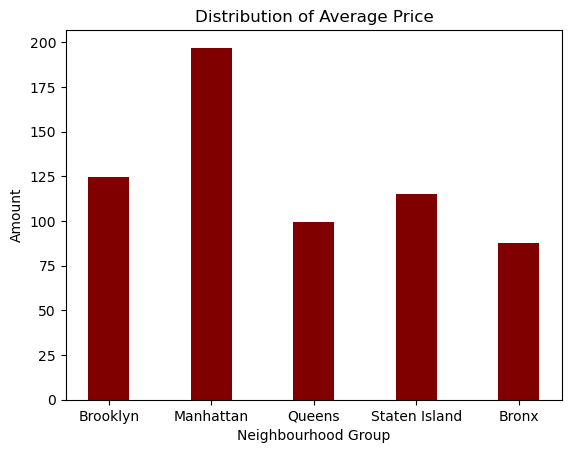

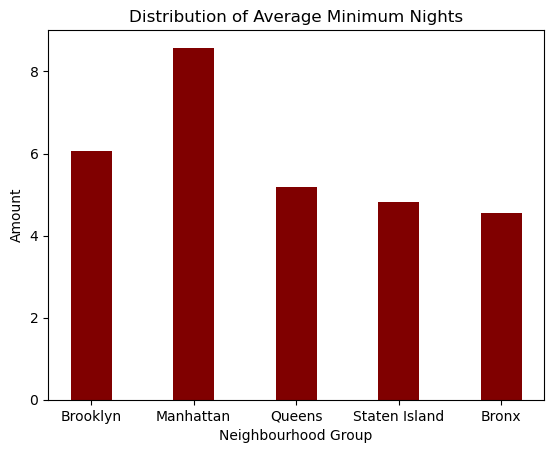

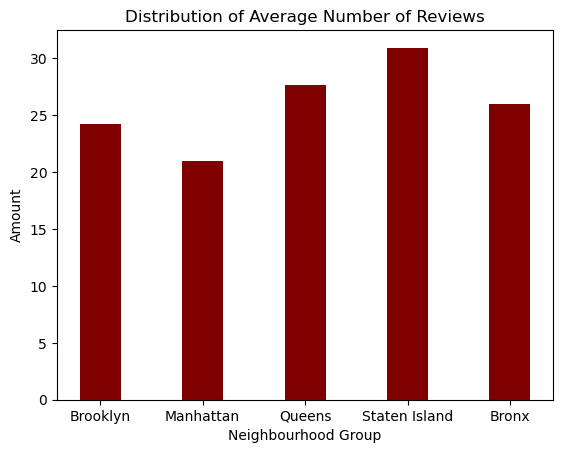

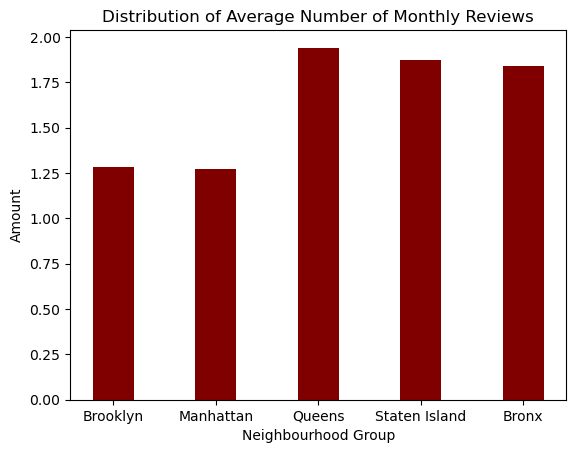

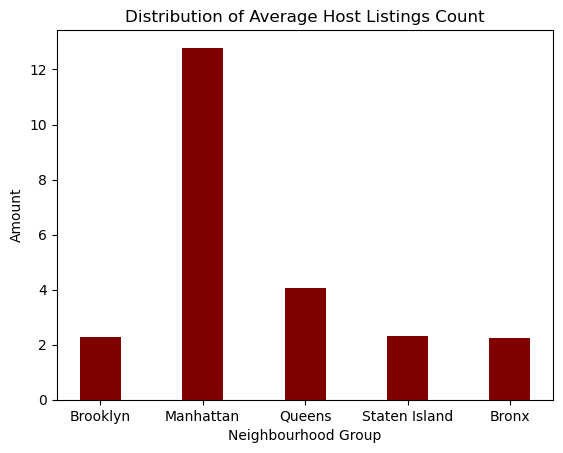

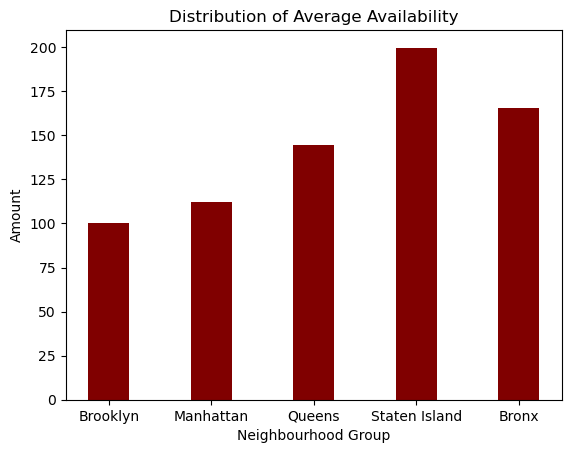

In [21]:
# plot the distribution of above variables wrt to neighbourhood location
titles = ["Price", "Minimum Nights", "Number of Reviews", "Number of Monthly Reviews", "Host Listings Count", "Availability"]
for attribute_no in range(len(neighbourhood_group_attributes[0])):
    values = []
    for neighbourhood_group_no in range(len(neighbourhood_group_attributes)):
        values.append(neighbourhood_group_attributes[neighbourhood_group_no][attribute_no])
    
    plt.bar(neighbourhood_groups, values, color ='maroon', width = 0.4)

    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Amount")
    plt.title("Distribution of Average " + titles[attribute_no])
    plt.show()

# Neighbourhood-wise Analysis of Attribute Distribution 

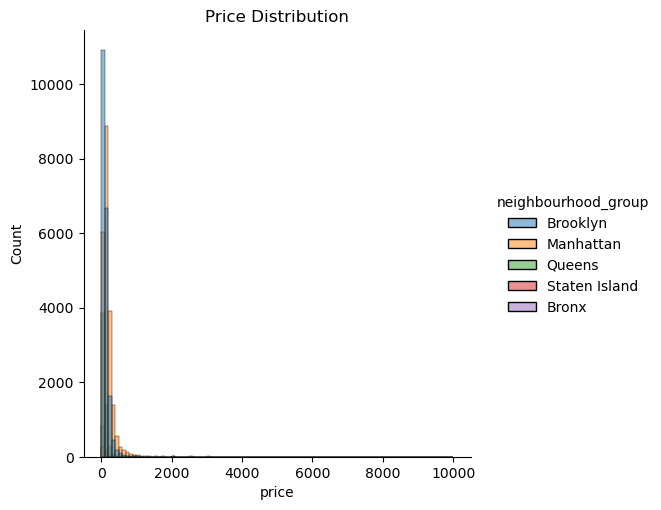

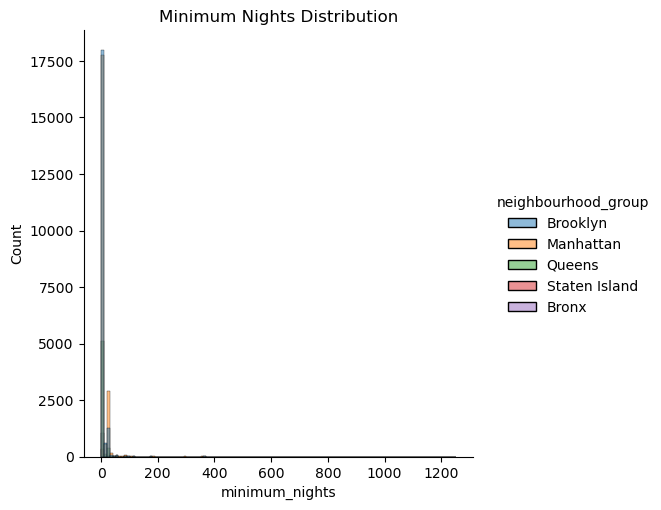

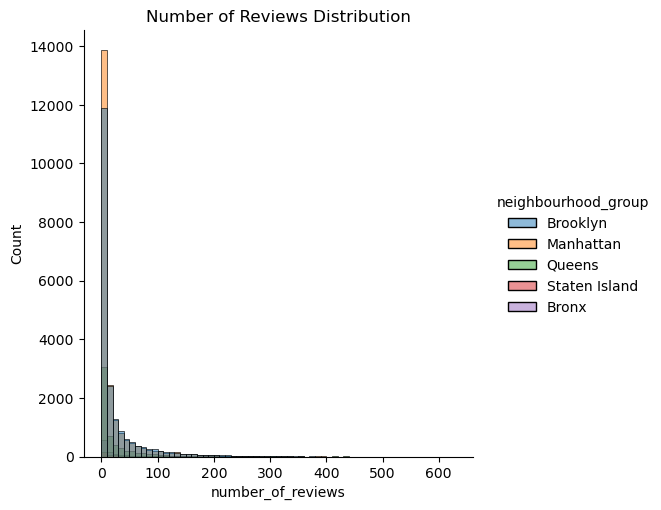

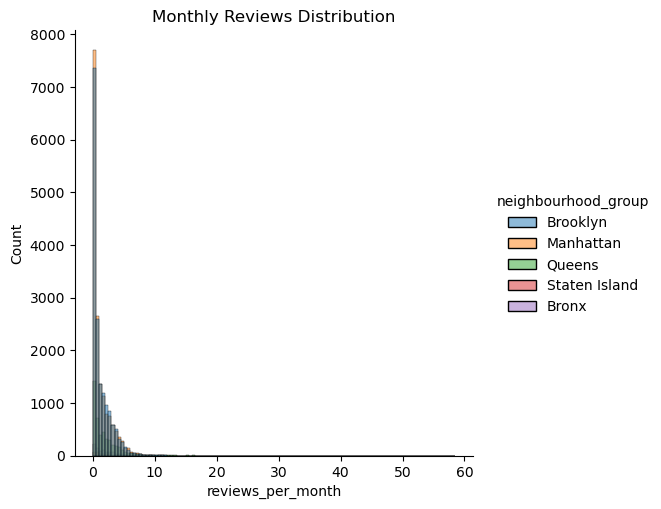

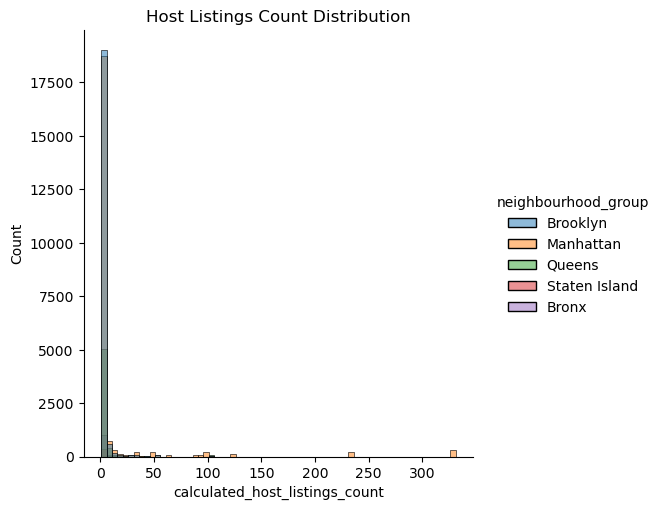

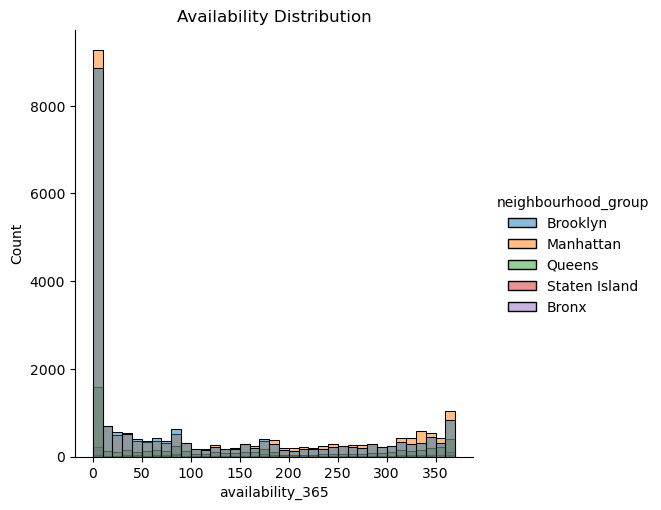

In [68]:
import seaborn as sns

# Price
sns.displot(df, x="price", hue="neighbourhood_group", binwidth=100).set(title="Price Distribution")
# Minimum Nights
sns.displot(df, x="minimum_nights", hue="neighbourhood_group", binwidth=10).set(title="Minimum Nights Distribution")
# Number of Reviews
sns.displot(df, x="number_of_reviews", hue="neighbourhood_group", binwidth=10).set(title="Number of Reviews Distribution")
# Monthly Reviews
sns.displot(df, x="reviews_per_month", hue="neighbourhood_group", binwidth=0.5).set(title="Monthly Reviews Distribution")
# Host Listings
sns.displot(df, x="calculated_host_listings_count", hue="neighbourhood_group", binwidth=5).set(title="Host Listings Count Distribution")
# Availability
sns.displot(df, x="availability_365", hue="neighbourhood_group", binwidth=10).set(title="Availability Distribution")